In [1]:
import wrangle as w
import clustering_feature_engineering as c

# making clusters:
# tabular data
import pandas as pd
import numpy as np
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn:
# the thing that will do the clustering:
from sklearn.cluster import KMeans
# the thing that will do the scaling:
from sklearn.preprocessing import MinMaxScaler
# the thing that will/would do a train-test split:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

Opening data from local file.


In [2]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


In [3]:
df = w.k_means_clustering(k=4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [4]:
train, validate, test = w.clean_split_df(df)

In [5]:
# train['clusters'] = clusters

In [6]:
# train.clusters.value_counts()

In [7]:
def univariate_visulization(df):
    
    cat_cols, num_cols = [], []
    for col in df.columns:
        if df[col].dtype == "o":
            cat_cols.append(col)
        else:
            if df[col].nunique() < 5:
                cat_cols.append(col)
            else: 
                num_cols.append(col)
                
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        
        if col in cat_cols:
            print(f'Univariate assessment of feature {col}:')
            sns.countplot(data=df, x=col, color='violet', edgecolor='black')
            plt.xticks(rotation=45)
            plt.show()

        if col in num_cols:
            print(f'Univariate feature analysis of feature {col}: ')
            plt.hist(df[col], color='violet', edgecolor='black')
            plt.show()
            plt.xticks(rotation=45)
            df[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

In [8]:
def bivariate_visulization(df, target):
    
    cat_cols = ['year', 'month', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'clusters']
    num_cols = ['customer_age', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price'] 
        
    print(f'Numeric Columns: {num_cols}')
    print(f'Categorical Columns: {cat_cols}')
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        if col in cat_cols:
            if col != target:
                print(f'Bivariate assessment of feature {col}:')
                sns.barplot(data = df, y = df[col], x = df[target], palette='crest')
                plt.xticks(rotation=45)
                plt.show()

#         if col in num_cols:
#             if col != target:
#                 print(f'Bivariate feature analysis of feature {col}: ')
#                 plt.scatter(y = df[col], x = df[target], color='turquoise')
#                 plt.axhline(df[target].mean(), ls=':', color='red')
#                 plt.axvline(df[col].mean(), ls=':', color='red')
#                 plt.xticks(rotation=45)
#                 plt.show()

    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

> Whats the ratio between costs and price on average

In [9]:
train.clusters.value_counts()

0    6814
1    6034
2    4223
3    2453
Name: clusters, dtype: int64

In [10]:
cluster_0 = train[train.clusters == 0]
cluster_1 = train[train.clusters == 1]
cluster_2 = train[train.clusters == 2]
cluster_3 = train[train.clusters == 3]

In [11]:
cluster_0.shape, cluster_1.shape, cluster_2.shape, cluster_3.shape

((6814, 16), (6034, 16), (4223, 16), (2453, 16))

In [12]:
clusters = [cluster_0, cluster_1, cluster_2, cluster_3]

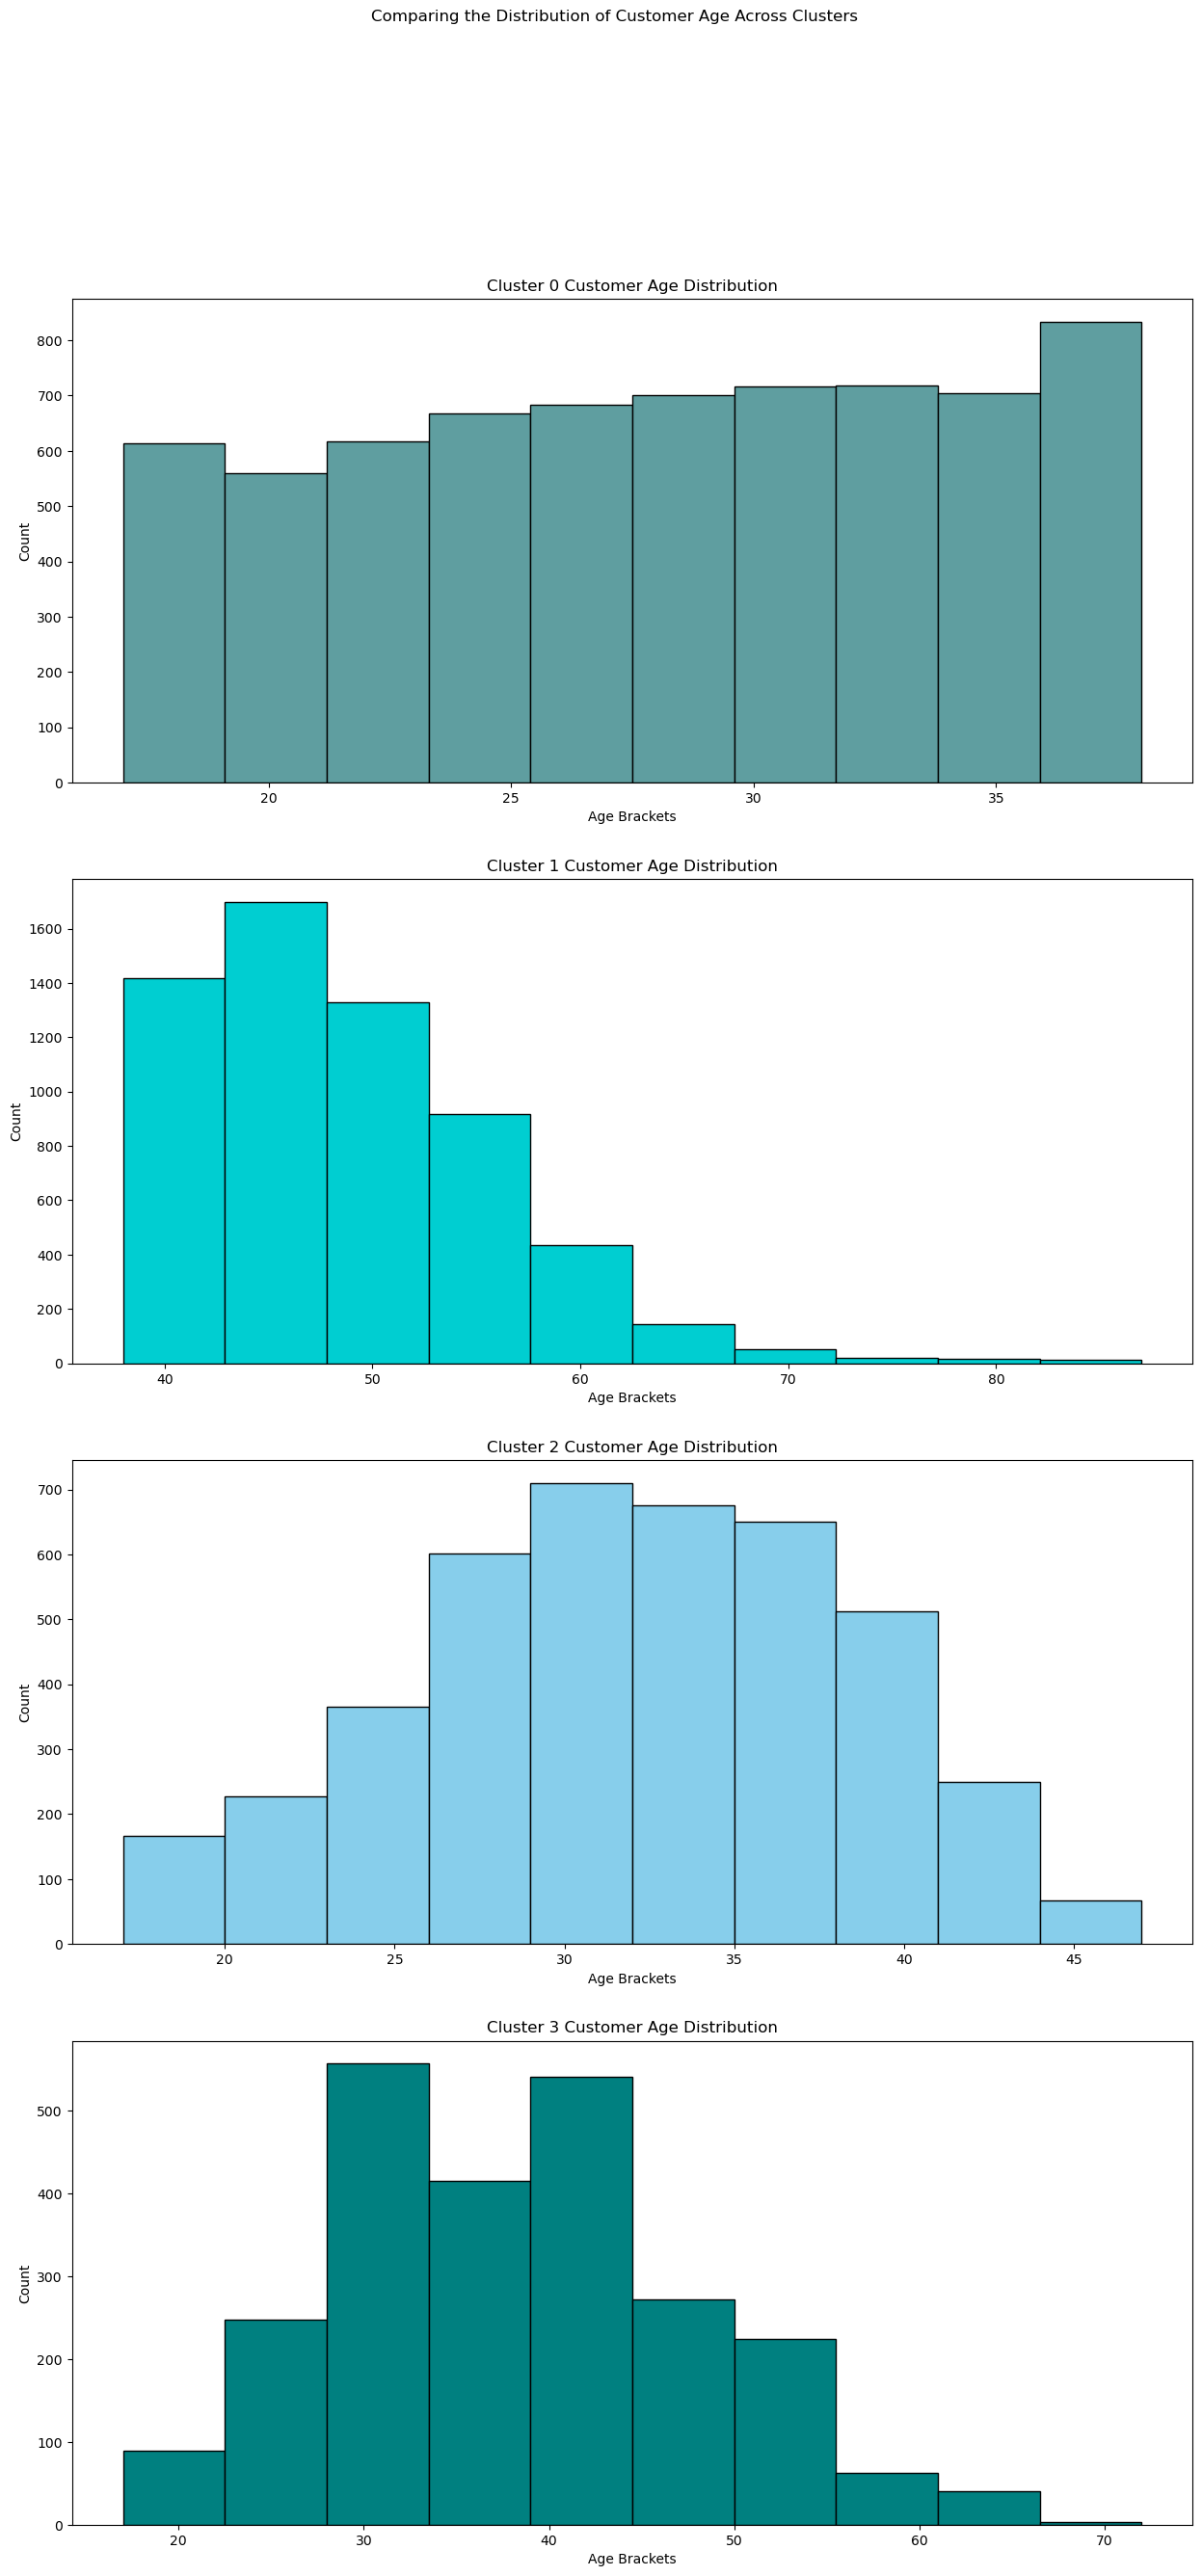

In [13]:
fig, axs = plt.subplots(len(clusters), 1, figsize=(15, 30))

axs[0].hist(cluster_0.customer_age, color='cadetblue', ec='black')
axs[1].hist(cluster_1.customer_age, color='darkturquoise', ec='black')
axs[2].hist(cluster_2.customer_age, color='skyblue', ec='black')
axs[3].hist(cluster_3.customer_age, color='teal', ec='black')

fig.suptitle("Comparing the Distribution of Customer Age Across Clusters")
axs[0].set_title('Cluster 0 Customer Age Distribution')
axs[1].set_title('Cluster 1 Customer Age Distribution')
axs[2].set_title('Cluster 2 Customer Age Distribution')
axs[3].set_title('Cluster 3 Customer Age Distribution')

axs[0].set_xlabel('Age Brackets')
axs[0].set_ylabel('Count')
axs[1].set_xlabel('Age Brackets')
axs[1].set_ylabel('Count')
axs[2].set_xlabel('Age Brackets')
axs[2].set_ylabel('Count')
axs[3].set_xlabel('Age Brackets')
axs[3].set_ylabel('Count')

plt.show()

In [14]:
def get_count_gender():
    ''' Gets boxplots of acquired continuous variables'''

    plt.figure(figsize=(5, 25))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Gender for cluster_{i}')

        # Display boxplot for column.
        sns.countplot(x=cluster['customer_gender'], hue=cluster['product_category'], palette='crest')

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

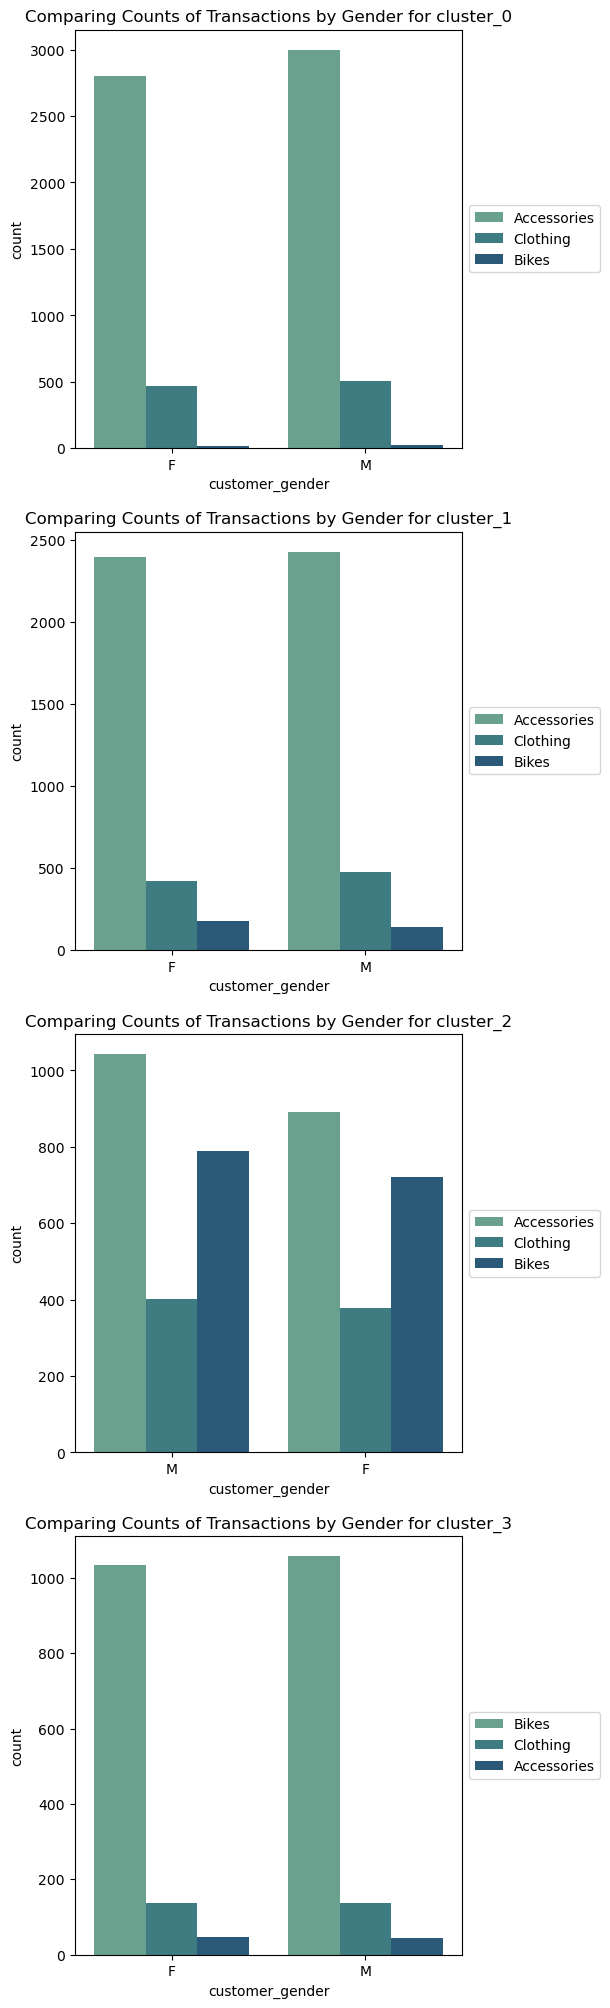

In [15]:
get_count_gender()

In [16]:
train.groupby('customer_gender').revenue.sum()

customer_gender
F    6082889.0
M    6434400.0
Name: revenue, dtype: float64

In [17]:
train.groupby(['clusters', 'customer_gender']).revenue.mean()

clusters  customer_gender
0         F                   169.834500
          M                   188.403459
1         F                   323.290538
          M                   319.244824
2         F                   901.699146
          M                   887.992384
3         F                  2271.708882
          M                  2276.831043
Name: revenue, dtype: float64

In [18]:
train.groupby(['clusters', 'product_category']).revenue.mean()

clusters  product_category
0         Accessories          174.640717
          Bikes                509.138889
          Clothing             195.938272
1         Accessories          278.570480
          Bikes                747.006250
          Clothing             398.559643
2         Accessories          858.140568
          Bikes                872.479443
          Clothing            1027.026923
3         Accessories         2057.711111
          Bikes               2325.073171
          Clothing            1955.573529
Name: revenue, dtype: float64

In [19]:
train.groupby(['clusters', 'product_category']).revenue.mean()

clusters  product_category
0         Accessories          174.640717
          Bikes                509.138889
          Clothing             195.938272
1         Accessories          278.570480
          Bikes                747.006250
          Clothing             398.559643
2         Accessories          858.140568
          Bikes                872.479443
          Clothing            1027.026923
3         Accessories         2057.711111
          Bikes               2325.073171
          Clothing            1955.573529
Name: revenue, dtype: float64

In [20]:
cluster_3 = train[train.clusters == 3]

In [21]:
cluster_3

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
15069,2016-02-24,2016,February,42,F,France,Yveline,Bikes,Road Bikes,2,850.50,1037.50,1701.0,2075.0,374.0,3
8720,2016-06-06,2016,June,32,M,United Kingdom,England,Bikes,Mountain Bikes,3,773.33,852.67,2320.0,2558.0,238.0,3
26894,2016-02-05,2016,February,43,F,France,Moselle,Bikes,Mountain Bikes,1,2320.00,2025.00,2320.0,2025.0,-295.0,3
19118,2015-04-14,2015,April,28,F,United States,Washington,Bikes,Road Bikes,1,2443.00,2135.00,2443.0,2135.0,-308.0,3
34280,2016-06-25,2016,June,33,F,United States,Oregon,Clothing,Jerseys,1,1512.00,1986.00,1512.0,1986.0,474.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,2015-05-08,2015,May,26,M,United States,California,Bikes,Mountain Bikes,1,2071.00,2000.00,2071.0,2000.0,-71.0,3
26756,2016-02-15,2016,February,23,M,France,Seine et Marne,Bikes,Touring Bikes,2,1192.00,1109.50,2384.0,2219.0,-165.0,3
7224,2015-06-07,2015,June,28,M,United Kingdom,England,Bikes,Mountain Bikes,1,2049.00,1697.00,2049.0,1697.0,-352.0,3
32794,2016-06-16,2016,June,35,M,United States,Washington,Bikes,Touring Bikes,1,2384.00,2283.00,2384.0,2283.0,-101.0,3


In [22]:
cluster_1.groupby('sub_category').revenue.mean()

sub_category
Bike Racks           496.600000
Bike Stands          759.750000
Bottles and Cages    135.037600
Caps                 168.370370
Cleaners             149.304000
Fenders              440.453988
Gloves               454.302752
Helmets              546.165951
Hydration Packs      697.604167
Jerseys              652.425455
Mountain Bikes       652.951807
Road Bikes           755.610000
Shorts               631.896552
Socks                175.068493
Tires and Tubes      258.198238
Touring Bikes        911.486486
Vests                646.580645
Name: revenue, dtype: float64

In [23]:
cluster_3.groupby('sub_category').revenue.mean()

sub_category
Bike Racks         3353.071429
Bike Stands        1879.937500
Helmets            1637.777778
Hydration Packs    1837.880000
Jerseys            1856.239669
Mountain Bikes     2328.717972
Road Bikes         2192.169460
Shorts             2046.093458
Tires and Tubes    1538.000000
Touring Bikes      2481.520930
Vests              2008.613636
Name: revenue, dtype: float64

In [24]:
cluster_1.groupby('customer_gender').revenue.mean()

customer_gender
F    323.290538
M    319.244824
Name: revenue, dtype: float64

In [25]:
cluster_3.groupby('customer_gender').revenue.mean()

customer_gender
F    2271.708882
M    2276.831043
Name: revenue, dtype: float64

In [26]:
import cbm_explore as ex

Opening data from local file.
Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0

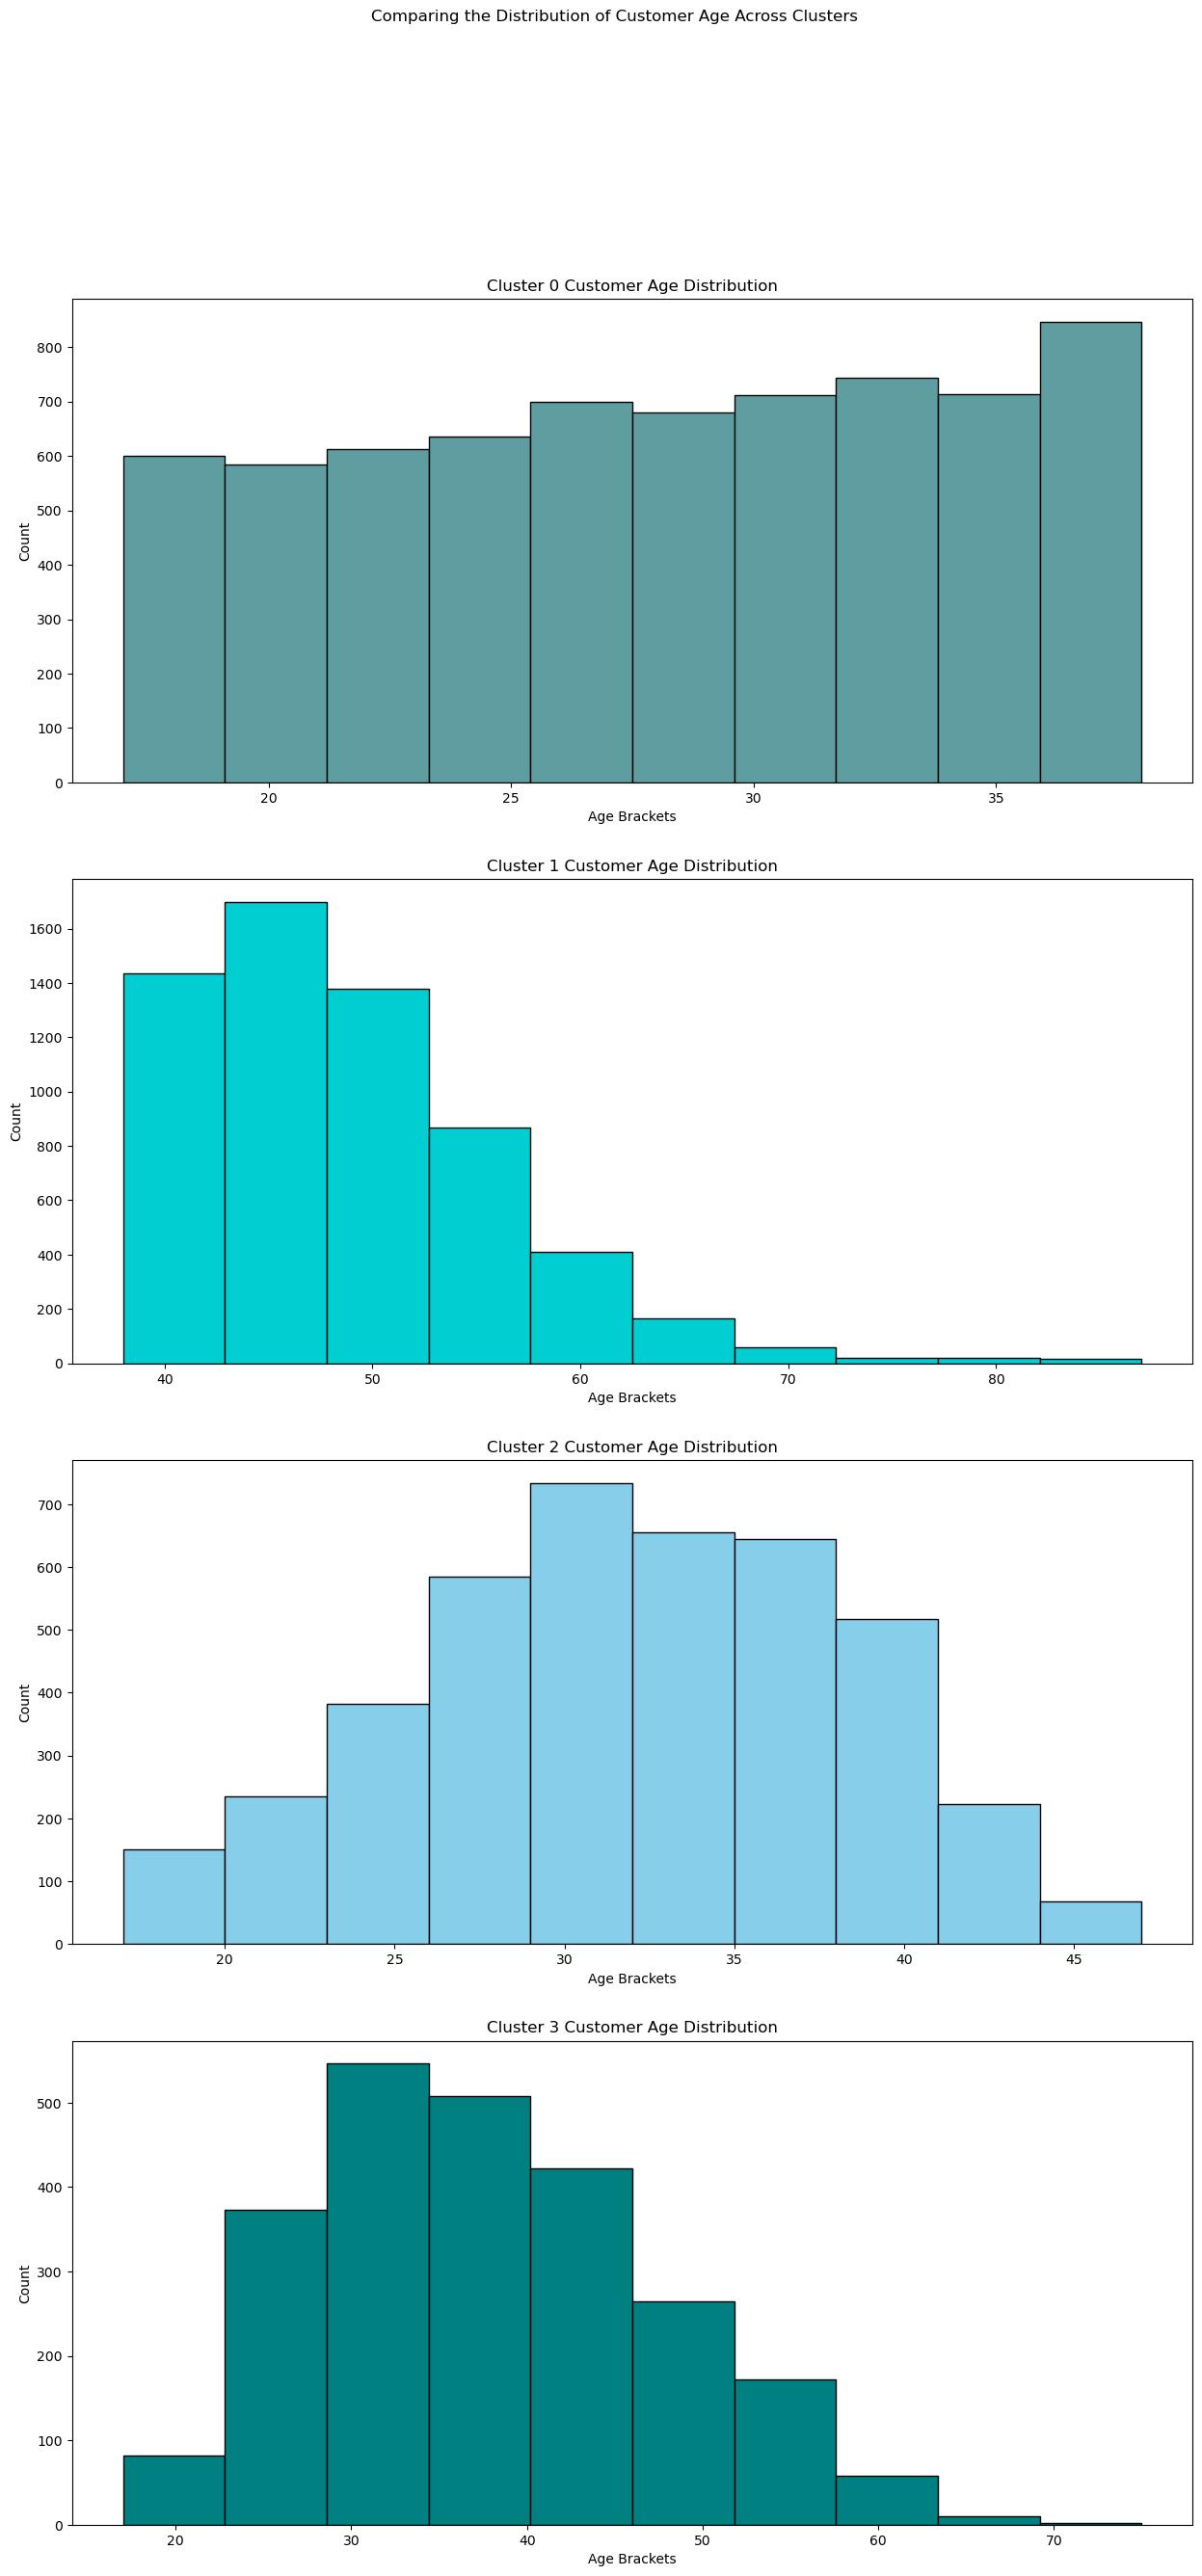

In [27]:
ex.viz_distribution_age()

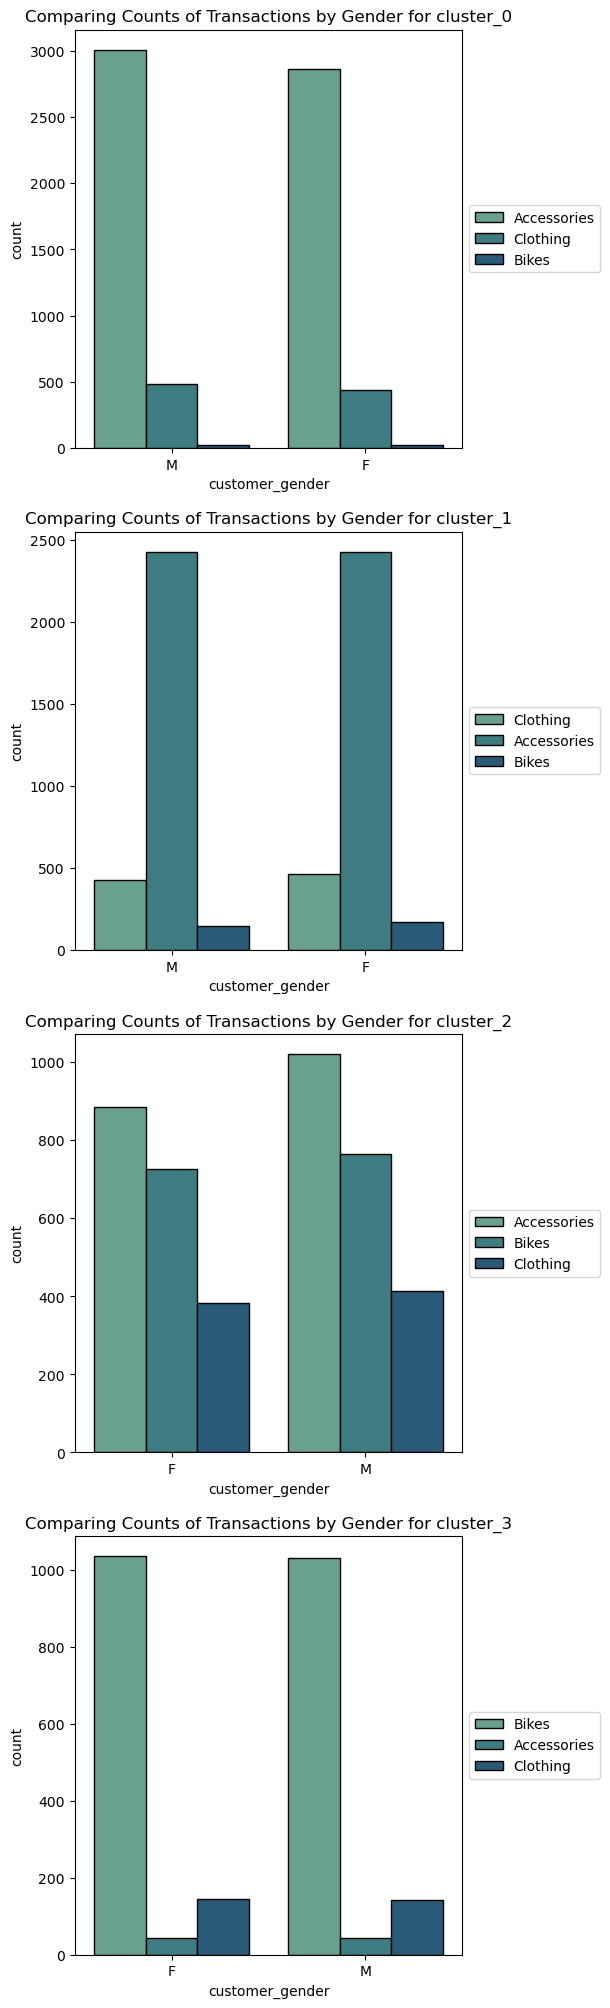

In [28]:
ex.get_count_gender()

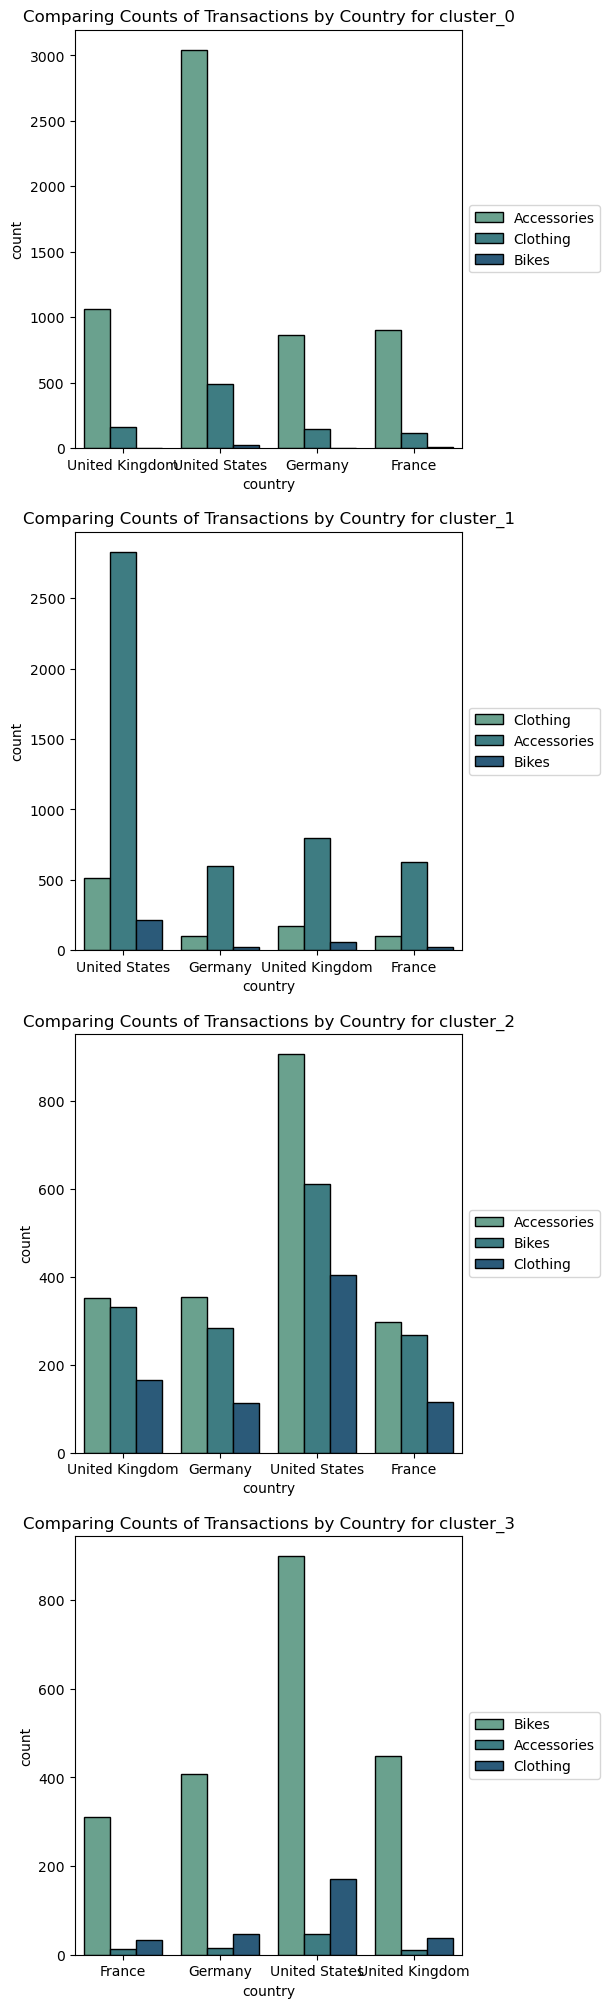

In [29]:
ex.get_count_country()

In [30]:
def get_revenue_by_subcat():
    ''' Gets boxplots of acquired continuous variables'''

    plt.figure(figsize=(15, 30))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Country for cluster_{i}')

        # Display boxplot for column.
        sns.boxplot(x=cluster['sub_category'], y=cluster['revenue'], palette='crest')
        
        plt.xticks(rotation=45)
        
        # using padding
        plt.tight_layout(pad=5.0)
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

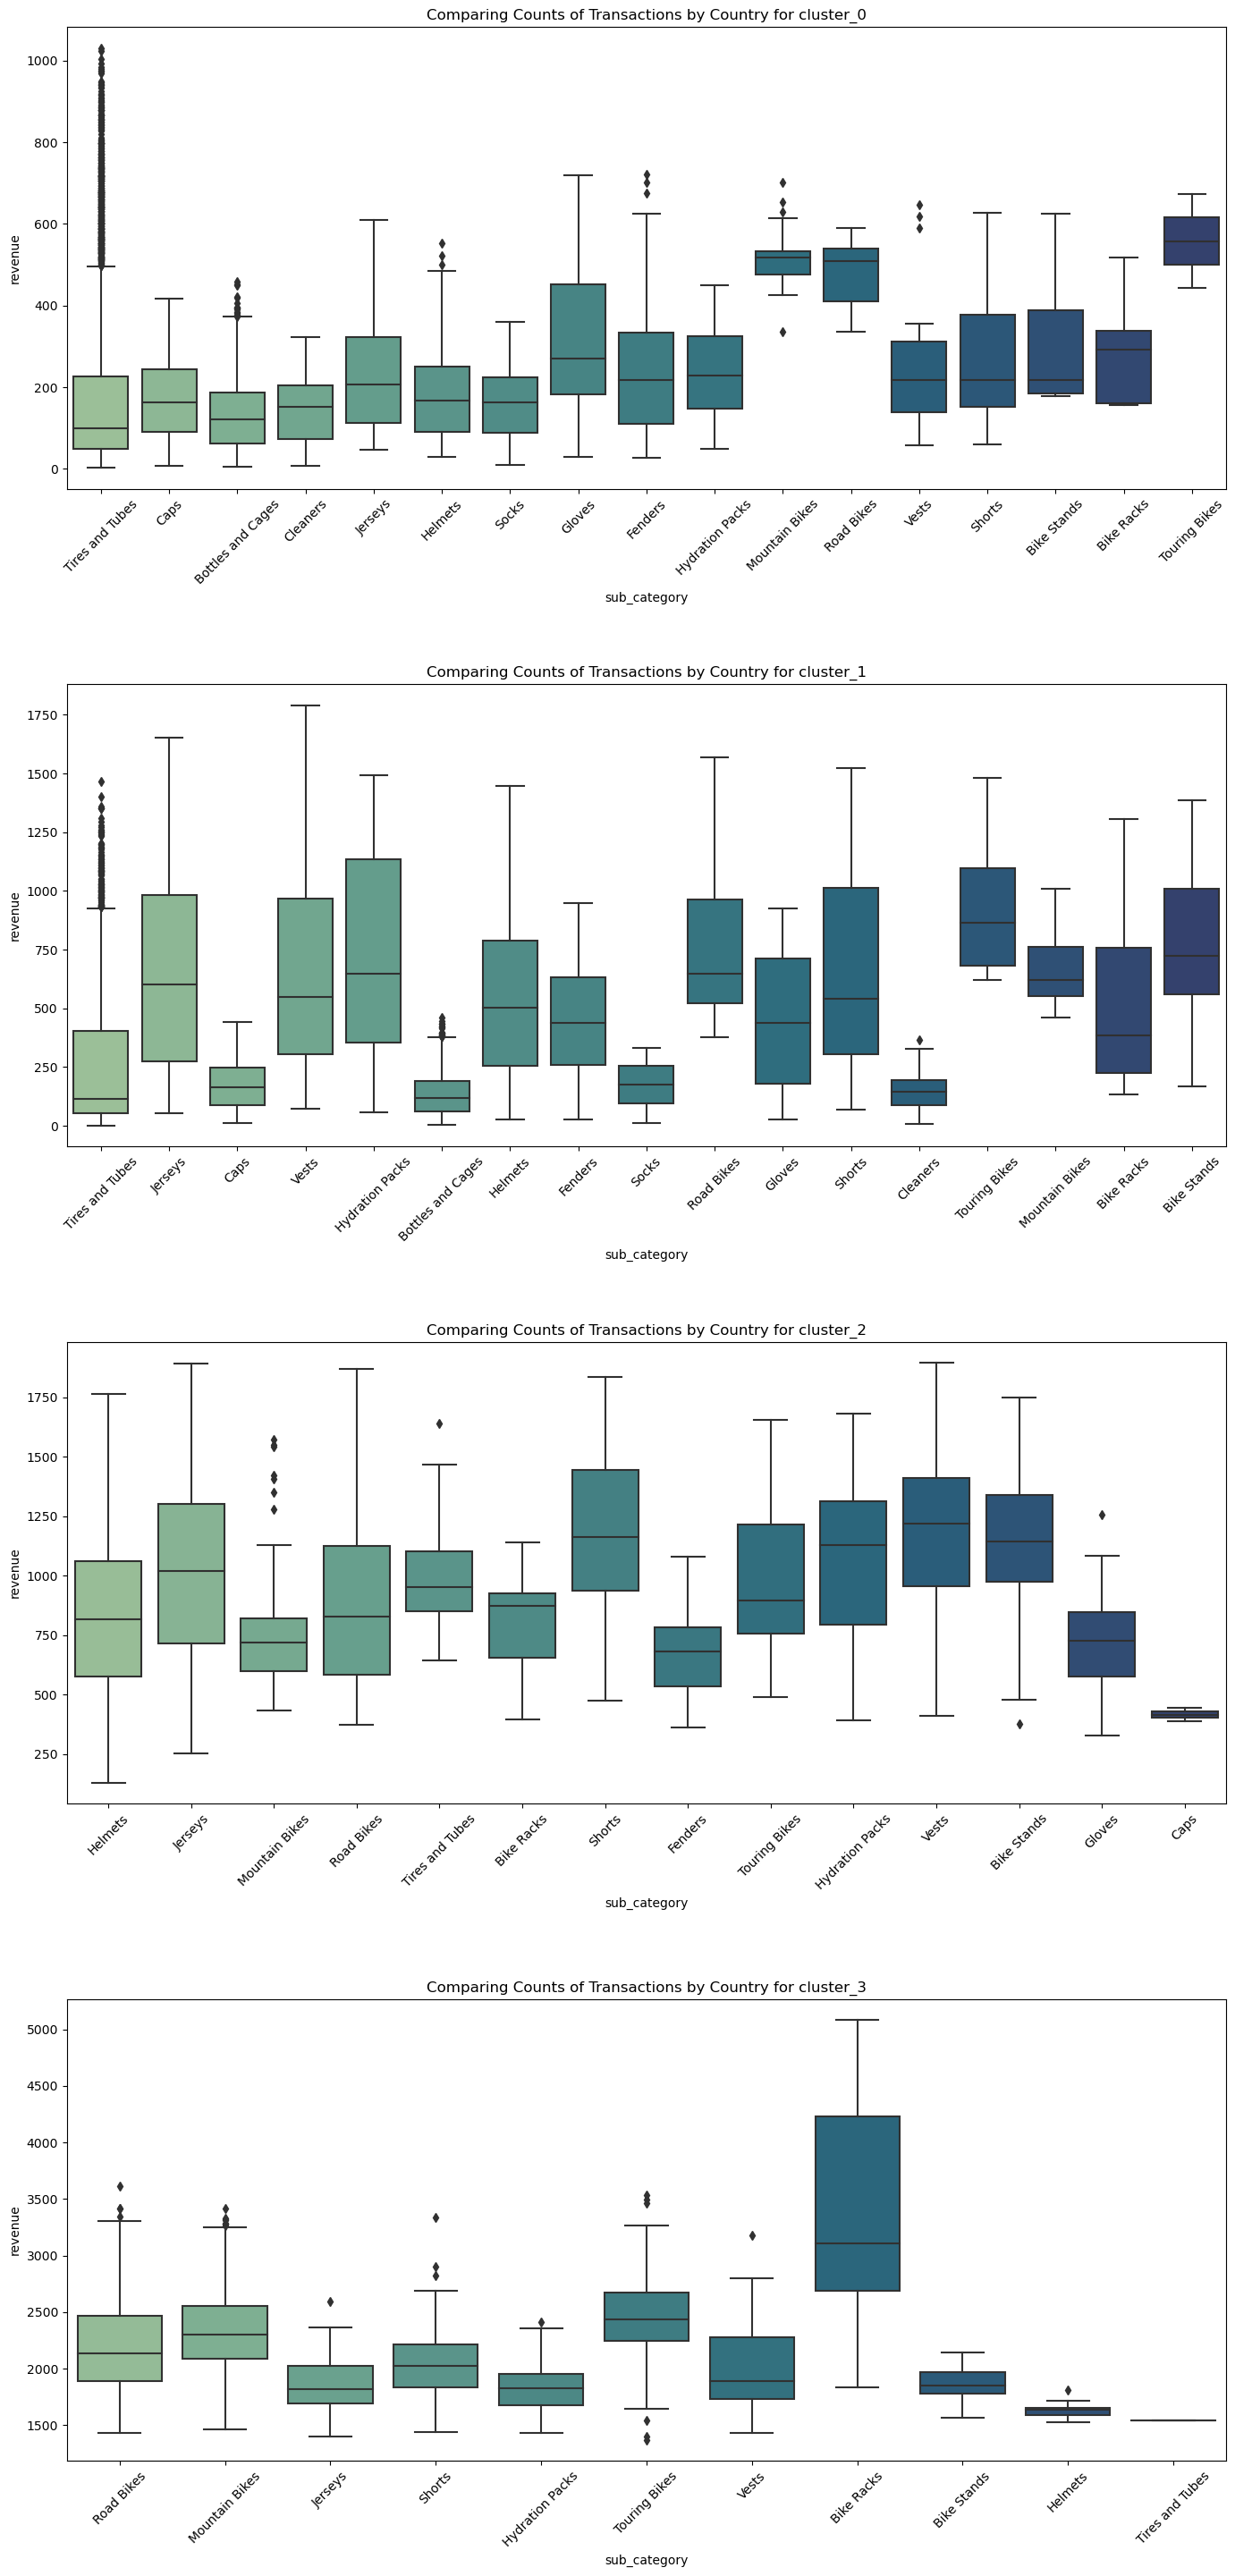

In [31]:
get_revenue_by_subcat()

In [32]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6814 entries, 31768 to 5564
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6814 non-null   datetime64[ns]
 1   year              6814 non-null   int64         
 2   month             6814 non-null   object        
 3   customer_age      6814 non-null   int64         
 4   customer_gender   6814 non-null   object        
 5   country           6814 non-null   object        
 6   state             6814 non-null   object        
 7   product_category  6814 non-null   object        
 8   sub_category      6814 non-null   object        
 9   quantity          6814 non-null   int64         
 10  unit_cost         6814 non-null   float64       
 11  unit_price        6814 non-null   float64       
 12  cost              6814 non-null   float64       
 13  revenue           6814 non-null   float64       
 14  profit            68

In [33]:
columnTransformer = ColumnTransformer([('label', LabelEncoder(), 
                                            ['customer_age', 'revenue'])], 
                                          remainder="passthrough")
    X = columnTransformer.fit_transform(df_clustering)
scat_cluster_0 = cluster_0

IndentationError: unexpected indent (3824553312.py, line 4)